In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Data = pd.read_csv("ProcessedChat.csv", index_col=0)
Data['Year'] = Data['Year'].astype(np.int32)
Data['Day'] = Data['Day'].astype(np.int32)
Data['Hour'] = Data['Hour'].astype(np.int32)
Data['Minute'] = Data['Minute'].astype(np.int32)
Data.drop(Data[Data.Sender == 'Notification'].index, inplace= True)
Data.reset_index(inplace=True, drop= True)
Data.head()

,Message,Sender,Year,Month,Day,Hour,Minute
0,Interviews me issi me karvate hai\n,Rishi,2022,December,27,12,1
1,"Interview toh nhi hi dena hai, degree le bhi l...",Dani,2022,December,27,12,1
2,Chutoya h bsdk ....unka khudka environment hot...,Shushu Bhai IIITDM,2022,December,27,12,1
3,Jake dekh yt pe google kisme karvata hai inter...,Rishi,2022,December,27,12,1
4,@919179170555 kya liya hai bhai NPTEL?\n,Dani,2022,December,27,12,2


In [17]:
Data.dtypes

Message    object
Sender     object
Year        int32
Month      object
Day         int32
Hour        int32
Minute      int32
dtype: object

In [18]:
# Message send by Total message send by eveyone
BusyUsers  = Data.Sender.value_counts().head(7)
BusyUsers

Sender
Dani                  1338
Rishi                 1130
Pushkar Bhai          1032
Booboo Bhai            892
Yusuf IIITDM           365
Shushu Bhai IIITDM     261
Ayush                  198
Name: count, dtype: int64

<BarContainer object of 7 artists>

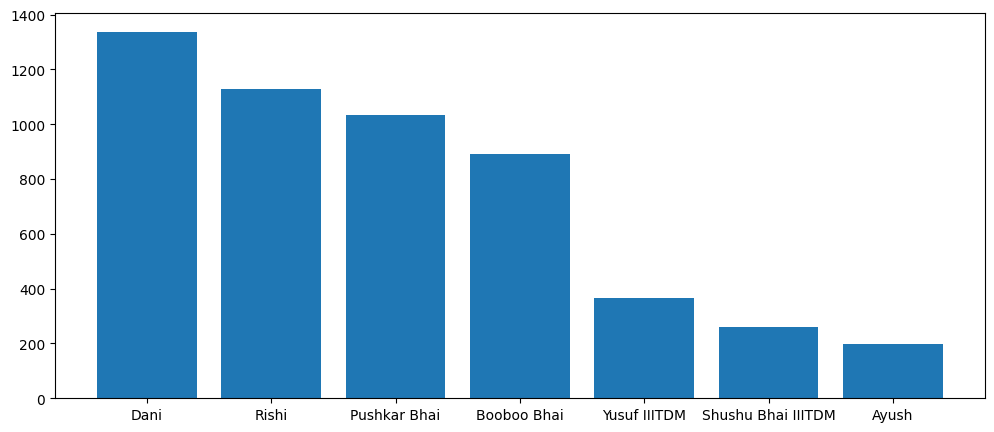

In [19]:
plt.figure(figsize=(12,5))
plt.bar(BusyUsers.index, BusyUsers.values)

Calculating the percentage of Message sent

In [20]:
round((Data.Sender.value_counts()/Data.shape[0])*100,2).reset_index().rename(columns = {'count':"Percent"})
# This is in the form of a DataFrame

,Sender,Percent
0,Dani,25.65
1,Rishi,21.66
2,Pushkar Bhai,19.79
3,Booboo Bhai,17.10
4,Yusuf IIITDM,7.00
5,Shushu Bhai IIITDM,5.00
6,Ayush,3.80


Getting top words

In [21]:
f = open('stopwords_hinglish.txt', 'r')
stpwrds = f.read().split('\n')
f.close()

words = []
for msg in Data['Message'] :
    if msg == '<Media omitted>\n':
        continue
    for wrd in str(msg).lower().split():
        if wrd not in stpwrds:
            words.append(wrd)

words

['interviews',
 'karvate',
 'interview',
 'dena',
 'hai,',
 'degree',
 'lu',
 'galti',
 'chutoya',
 'bsdk',
 '....unka',
 'khudka',
 'environment',
 'jake',
 'yt',
 'google',
 'kisme',
 'karvata',
 'interview',
 '@919179170555',
 'nptel?',
 'maut',
 'farman',
 'point',
 'aate',
 '😂😂',
 'ha',
 'sirf',
 'google',
 'bsdk',
 '....microsoft',
 'amazon',
 'krvata',
 'python',
 'cloud',
 'cloud',
 'business',
 'ek?',
 '+1',
 'bussiness',
 'sem',
 'hmmm..',
 'sem',
 '22',
 'cred',
 'himara',
 'ooooohhh',
 'nice',
 'yaad',
 'dilao',
 'behen',
 'lawde',
 '@916261247221',
 'timetable',
 'khali',
 'hai?',
 '🤣',
 'courses',
 'humse',
 'zadda',
 'credit',
 'zadda',
 'bsdk',
 'point',
 'raho',
 'n',
 'aabi',
 'bhare',
 'timetable',
 'jaan',
 'lete',
 'external',
 'mummi',
 'cloud',
 'bhejoge',
 'syllabus?',
 'kya*',
 'hmmm',
 'site',
 'konsi',
 'nptel',
 'deadline',
 'kb',
 'tk',
 'hai???',
 'precise',
 'time',
 'sham',
 'beje',
 'bhar',
 'dete',
 'aabi',
 'abc',
 'id',
 'bi',
 'dekhna',
 '....meko',

In [22]:
from collections import Counter
ct = Counter(words)
Cmn_wrds = pd.DataFrame(ct.most_common(len(ct)))
Cmn_wrds.head(50)


,0,1
0,baat,85
1,🙂,78
2,ha,73
3,madarchod,67
4,aa,65
5,ky,57
6,n,52
7,😂😂,49
8,kr,49
9,😅😅,48


## Analysing Emojis

In [23]:
import emoji
Data.head()

,Message,Sender,Year,Month,Day,Hour,Minute
0,Interviews me issi me karvate hai\n,Rishi,2022,December,27,12,1
1,"Interview toh nhi hi dena hai, degree le bhi l...",Dani,2022,December,27,12,1
2,Chutoya h bsdk ....unka khudka environment hot...,Shushu Bhai IIITDM,2022,December,27,12,1
3,Jake dekh yt pe google kisme karvata hai inter...,Rishi,2022,December,27,12,1
4,@919179170555 kya liya hai bhai NPTEL?\n,Dani,2022,December,27,12,2


In [24]:
used_emojis= []
for msg in Data.Message :
    for ch in str(msg):
        if emoji.is_emoji(ch):
            used_emojis.append(ch)
    # used_emojis.extend([em for em in emoji.UNICODE_EMOJI['en']])
len(used_emojis)

1790

In [25]:
emoji_count = Counter(used_emojis)
emoji_count

used_emojis=pd.DataFrame(emoji_count.most_common(len(emoji_count)), index=range(len(emoji_count)))
used_emojis

,0,1
0,😂,459
1,🙂,298
2,🤣,199
3,😅,164
4,🥲,115
5,🙃,74
6,😏,72
7,👀,71
8,😌,39
9,🫂,31


In [26]:
ct = used_emojis.head(10)
ct.iloc[9,0]='Other'
ct.iloc[9,1]=sum(used_emojis[1][9:])
ct
# ct.add({0:'Others',1:sum(used_emojis[1][9:])})

,0,1
0,😂,459
1,🙂,298
2,🤣,199
3,😅,164
4,🥲,115
5,🙃,74
6,😏,72
7,👀,71
8,😌,39
9,Other,299


In [27]:
ct.dtypes

0    object
1     int64
dtype: object

## Analysing Time Based
- Month timeline

In [28]:
Data.Month.value_counts()

Month
May          2284
July         1048
December      868
April         318
January       220
March         192
June          105
February       91
August         82
September       8
Name: count, dtype: int64

In [37]:
timeline = Data.groupby(['Year','Month']).count()['Message'].reset_index()
month_order = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
timeline['Month_num'] = timeline.Month.map(month_order)
timeline.sort_values(by=['Year','Month_num'],inplace=True)
timeline.reset_index(inplace=True,drop=True)
timeline

,Year,Month,Message,Month_num
0,2022,December,868,12
1,2023,January,220,1
2,2023,February,89,2
3,2023,March,192,3
4,2023,April,318,4
5,2023,May,2280,5
6,2023,June,103,6
7,2023,July,1048,7
8,2023,August,81,8
9,2023,September,8,9


In [38]:
time = []
for i in range(timeline.shape[0]):
    time.append(str(timeline.Year.iloc[i])+" - "+str(timeline.Month.iloc[i]))
timeline['Time'] = time
timeline

,Year,Month,Message,Month_num,Time
0,2022,December,868,12,2022 - December
1,2023,January,220,1,2023 - January
2,2023,February,89,2,2023 - February
3,2023,March,192,3,2023 - March
4,2023,April,318,4,2023 - April
5,2023,May,2280,5,2023 - May
6,2023,June,103,6,2023 - June
7,2023,July,1048,7,2023 - July
8,2023,August,81,8,2023 - August
9,2023,September,8,9,2023 - September


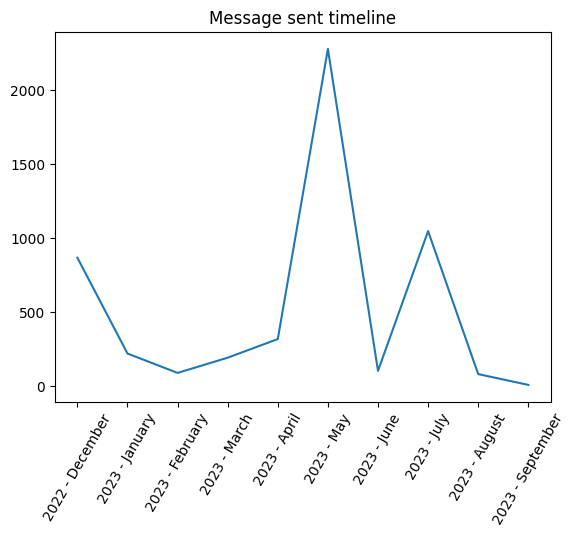

In [40]:
plt.plot(timeline.Time, timeline.Message)
plt.xticks(rotation= 60)
plt.title("Message sent timeline")
plt.show()